# Project: Impact of Technology on GDP Growth (1960–2020)

### 👋 Introduction
This project explores **how technology influences a country’s economic growth** over time.  
Using a simulated dataset of 120 countries from 1960 to 2020, we analyze the relationship between **technological progress** — represented by:
- Research & Development (R&D) expenditure (% of GDP),
- Internet usage (% of population),
- ICT goods exports (% of total exports),
- ICT services exports (% of service exports),

and key economic indicators such as **GDP (Gross Domestic Product)** and **GDP growth**.

The goal is to **follow a full Data Science pipeline**  from data loading and cleaning to analysis, visualization, and modeling  to understand:
- How global GDP has evolved over time,  
- Whether increased technology adoption correlates with economic growth, and  
- Which technological factors contribute most to development.

---


In [1]:
# Step 1: Import basic libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Configure basic style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
# Step 2: Load dataset
df = pd.read_csv("/content/120-countries_gdp_growth.csv")


In [4]:
# Show basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

Shape: (7319, 10)

Columns: ['country', 'year', 'gdp_usd', 'gdp_yoy_growth', 'gdp_cagr_5y', 'ln_gdp', 'rnd_percent_gdp', 'internet_pct', 'ict_goods_pct', 'ict_services_pct']

Data types:
country              object
year                  int64
gdp_usd             float64
gdp_yoy_growth      float64
gdp_cagr_5y         float64
ln_gdp              float64
rnd_percent_gdp     float64
internet_pct        float64
ict_goods_pct       float64
ict_services_pct    float64
dtype: object


In [5]:
# Preview data
df.head()

,country,year,gdp_usd,gdp_yoy_growth,gdp_cagr_5y,ln_gdp,rnd_percent_gdp,internet_pct,ict_goods_pct,ict_services_pct
0,Africa Eastern and Southern,1960,1.931311e+10,NaN,NaN,23.684050,0.082266,0.000000,0.512461,1.128991
1,Africa Eastern and Southern,1961,1.972349e+10,0.021249,NaN,23.705076,0.147274,1.321544,0.920803,1.779003
2,Africa Eastern and Southern,1962,2.149392e+10,0.089763,NaN,23.791036,1.118949,4.718227,2.235811,3.789016
3,Africa Eastern and Southern,1963,2.573321e+10,0.197232,NaN,23.971048,0.778060,5.489782,2.238255,3.830182
4,Africa Eastern and Southern,1964,2.352744e+10,-0.085717,NaN,23.881433,0.224606,5.836206,2.028134,3.552500


In [6]:
#Step 3: Check for missing values
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
country               0
year                  0
gdp_usd               0
gdp_yoy_growth      120
gdp_cagr_5y         600
ln_gdp                0
rnd_percent_gdp       0
internet_pct          0
ict_goods_pct         0
ict_services_pct      0
dtype: int64


In [7]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7319.0,1.990004e+03,1.760573e+01,1.960000e+03,1.975000e+03,1.990000e+03,2.005000e+03,2.020000e+03
gdp_usd,7319.0,1.699082e+12,6.478137e+12,1.159201e+07,3.528964e+09,3.219727e+10,3.615000e+11,8.760000e+13
gdp_yoy_growth,7199.0,8.001783e-02,1.338721e-01,-6.177396e-01,1.700805e-02,7.536910e-02,1.372549e-01,3.051580e+00
gdp_cagr_5y,6719.0,7.756840e-02,6.888293e-02,-2.071180e-01,3.252855e-02,7.485498e-02,1.205912e-01,5.113143e-01
ln_gdp,7319.0,2.435880e+01,3.135507e+00,1.626583e+01,2.198427e+01,2.419515e+01,2.661353e+01,3.210380e+01
rnd_percent_gdp,7319.0,2.153736e+00,1.228258e+00,0.000000e+00,1.148956e+00,2.161639e+00,3.140766e+00,5.603870e+00
internet_pct,7319.0,4.748129e+01,2.787921e+01,0.000000e+00,2.335521e+01,4.750761e+01,7.153027e+01,9.716280e+01
ict_goods_pct,7319.0,1.287635e+01,7.202409e+00,0.000000e+00,6.645489e+00,1.286744e+01,1.907562e+01,2.627035e+01
ict_services_pct,7319.0,2.079756e+01,1.146039e+01,0.000000e+00,1.087171e+01,2.079388e+01,3.067263e+01,4.197833e+01


In [8]:
#Step 4: Fill missing values in GDP growth columns with 0
df["gdp_yoy_growth"].fillna(0, inplace=True)   # Replace missing yearly GDP growth with 0
df["gdp_cagr_5y"].fillna(0, inplace=True)      # Replace missing 5-year average GDP growth with 0


/tmp/ipython-input-1264036010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["gdp_yoy_growth"].fillna(0, inplace=True)   # Replace missing yearly GDP growth with 0
/tmp/ipython-input-1264036010.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

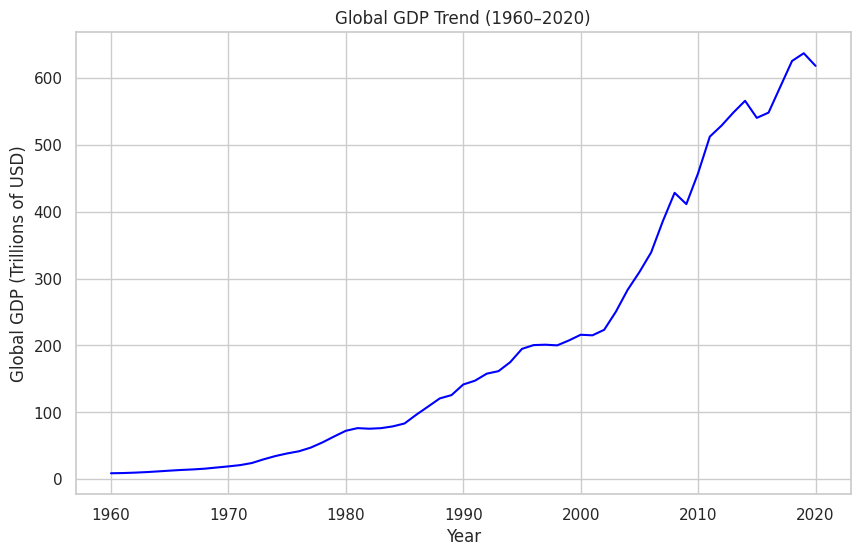

In [9]:
# Step 5: Exploratory Data Analysis (EDA)
# Group data by year and sum all countries' GDP
gdp_trend = df.groupby("year")["gdp_usd"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(gdp_trend["year"], gdp_trend["gdp_usd"] / 1e12, color="blue")
plt.title("Global GDP Trend (1960–2020)")
plt.xlabel("Year")
plt.ylabel("Global GDP (Trillions of USD)")
plt.show()


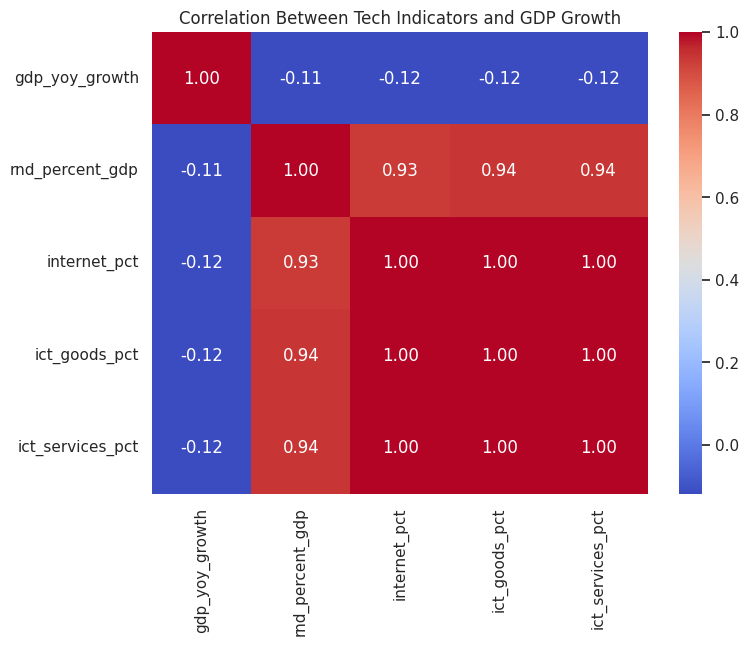

In [10]:
corr_cols = ["gdp_yoy_growth", "rnd_percent_gdp", "internet_pct",
             "ict_goods_pct", "ict_services_pct"]

corr = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Tech Indicators and GDP Growth")
plt.show()


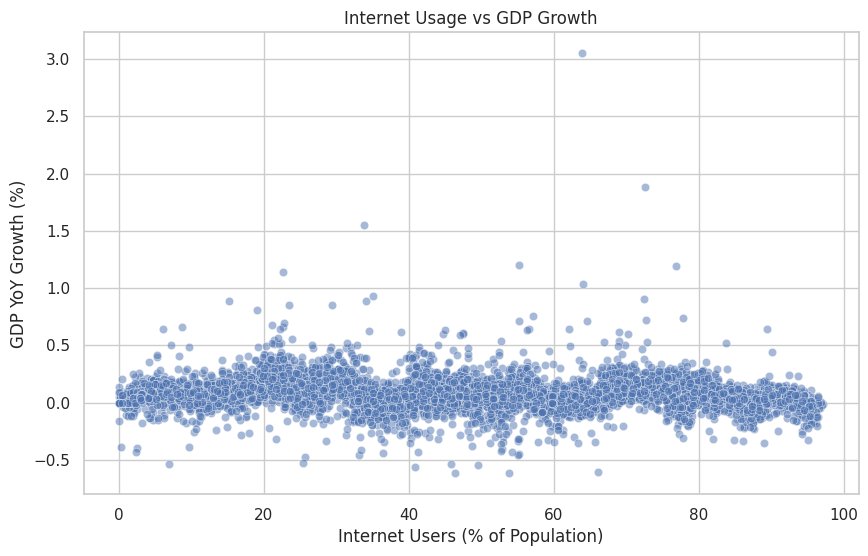

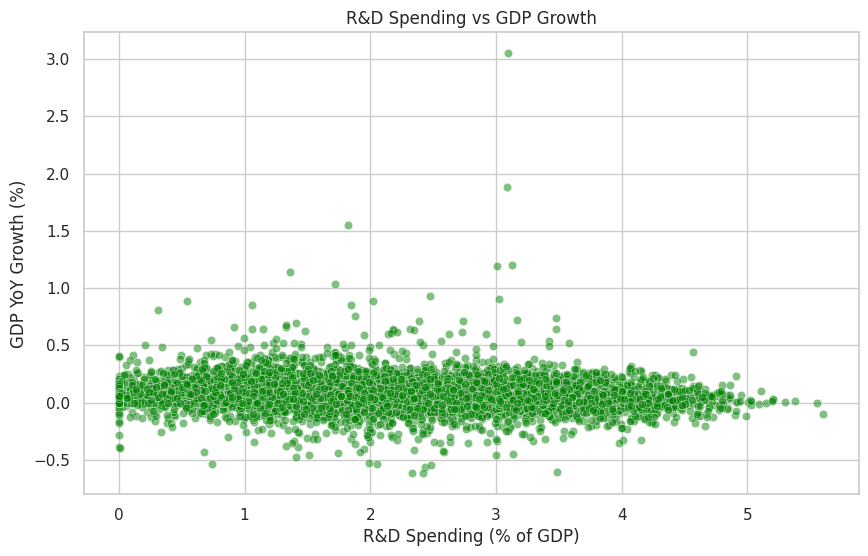

In [11]:
# Internet usage vs GDP growth
sns.scatterplot(x="internet_pct", y="gdp_yoy_growth", data=df, alpha=0.5)
plt.title("Internet Usage vs GDP Growth")
plt.xlabel("Internet Users (% of Population)")
plt.ylabel("GDP YoY Growth (%)")
plt.show()

# R&D spending vs GDP growth
sns.scatterplot(x="rnd_percent_gdp", y="gdp_yoy_growth", data=df, alpha=0.5, color="green")
plt.title("R&D Spending vs GDP Growth")
plt.xlabel("R&D Spending (% of GDP)")
plt.ylabel("GDP YoY Growth (%)")
plt.show()


In [12]:
# Step 6: Simple Modeling (Linear Regression)
# Select features and target
features = ["rnd_percent_gdp", "internet_pct", "ict_goods_pct", "ict_services_pct"]
target = "gdp_yoy_growth"

X = df[features]
y = df[target]

In [13]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [14]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Show feature importance
coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})
print("\nFeature Importance:")
print(coefficients)

Model Performance:
R² Score: 0.038
RMSE: 0.124

Feature Importance:
            Feature  Coefficient
0   rnd_percent_gdp    -0.063409
1      internet_pct    -0.046637
2     ict_goods_pct    -0.456022
3  ict_services_pct     0.405035


#  Conclusion and Final Thoughts

###  Summary
Through exploratory data analysis and regression modeling, we observed that:
- **Global GDP** has shown steady and significant growth from 1960 to 2020.  
- **Technology indicators** (R&D, Internet, ICT goods, ICT services) are highly correlated, suggesting that technological progress tends to advance across multiple dimensions simultaneously.  
- The **short-term relationship** between these technology indicators and GDP growth is relatively weak, but **ICT services exports** show the most positive association with economic performance.

###  Model Evaluation
To quantify these relationships, a **Linear Regression model** was built with the following evaluation metrics:
- **R² Score:** `0.038` → the model explains about **3.8% of GDP growth variation** using tech indicators.  
- **RMSE:** `0.124` → on average, predictions differ from actual GDP growth by about **0.12 units**.

These scores indicate that while technology plays an important role, **economic growth depends on multiple factors** beyond technology alone — such as governance, education, trade, and infrastructure.

###  Interpretation
- **ICT services exports** had the strongest positive coefficient, implying that economies investing in digital service industries (e.g., software, telecom, IT outsourcing) experience stronger growth.  
- **R&D and Internet usage** showed weaker or slightly negative coefficients, possibly due to **time-lag effects** — their economic benefits emerge over longer periods.  
- The results reflect real-world patterns: **technology is a long-term growth enabler**, not always an immediate catalyst.

###  Next Steps
Future work could:
- Add **other macroeconomic variables** (education, trade, FDI, inflation).  
- Incorporate **lag variables** (e.g., R&D spending from previous years).  
- Compare **developed vs developing nations** to explore differences in technological impact.

---

 *This notebook demonstrates a complete Data Science workflow — from data preparation to insights — and shows how technology influences economic growth using clear metrics, visualizations, and modeling.*
